In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtl
import seaborn as sns
import plotly_express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay

C:\Users\AMB\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\AMB\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Loading DataSet

In [2]:
df = pd.read_csv("churn-bigml-80.csv")

## Cleaning Data

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## Exploratory Data Analysis

In [7]:
stateareacode=df.groupby(['State','Area code'])[['Account length']].count()

In [8]:
stateareacode

Account length
State Area code                
AK    408                     9
      415                    21
      510                    13
AL    408                    22
      415                    32
...                         ...
WV    415                    46
      510                    27
WY    408                    15
      415                    35
      510                    16

[153 rows x 1 columns]

In [9]:
print('Description of the Categorical Dataset:')
df.describe(include=['object', 'bool']).T

Description of the Categorical Dataset:


,count,unique,top,freq
State,2666,51,WV,88
International plan,2666,2,No,2396
Voice mail plan,2666,2,No,1933
Churn,2666,2,False,2278


In [10]:
def draw_categorical_plot(data, figsize=(8, 6), colors=None):
    
    if not isinstance(data, pd.Series):
        raise ValueError("Input data should be a categorical data.")
    
    # Count the occurrences of each category in the data
    counts = data.value_counts()
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # If there are less than 6 unique observations, draw a pie chart
    if len(counts) <= 5:
        counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
        ax.set_title("Pie Chart of " + data.name)
        ax.set_ylabel("")  # This is to remove the column name from the side of the pie chart
    else:
        # Otherwise, draw a bar chart
        sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=ax)
        ax.set_title("Bar Chart of " + data.name)
        ax.set_ylabel("Count")
    
    plt.tight_layout()



In [11]:
def plot_data(df, numeric_col, category_col=None):
    plt.figure(figsize=(10, 8))
    
    # Plotting histogram using seaborn
    sns.histplot(data=df, x=numeric_col, kde=True, hue=category_col)
    
    plt.title(f'Distribution of {numeric_col}')
    plt.ylabel('Frequency')
    plt.xlabel(numeric_col)


In [12]:
def draw_numeric_plot(data):
    
    num_unique = data.nunique()
    
    if num_unique == 2:
        # Donut chart
        plt.figure(figsize=(8, 6))
        # Extract the value counts and labels
        counts = data.value_counts()
        labels = counts.index

        # Plot
        wedges, texts, autotexts = plt.pie(counts, labels=labels, wedgeprops=dict(width=0.4), 
                                           autopct='%1.1f%%', startangle=140, pctdistance=0.85)
    
        # Draw center circle for 'donut' style
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        plt.gca().add_artist(centre_circle)

        # Improve text visibility
        for text, autotext in zip(texts, autotexts):
            text.set(size=12)
            autotext.set(size=12)

        plt.title(f"Donut Chart of {data.name}")
        plt.ylabel("")  # Remove automatic label
        plt.legend(loc="best")  # Display a legend
    
    elif 3 <= num_unique <= 50:
        # Bar chart
        plt.figure(figsize=(12, 6))
        data.value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title(f"Bar Chart for {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)
    
    elif 51 <= num_unique < 90:
        # Simple histogram
        plt.figure(figsize=(12, 6))
        plt.hist(data, bins=30, edgecolor='black', color='skyblue')
        plt.title(f"Histogram of {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)
    
    elif num_unique >= 90:
        # Histogram and boxplot
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        
        ax[0].hist(data, bins=30, edgecolor='black', color='skyblue')
        ax[0].set_title(f"Histogram of {data.name}")
        ax[0].set_ylabel("Frequency")
        ax[0].set_xlabel(data.name)
        
        ax[1].boxplot(data, vert=False)
        ax[1].set_title(f"Boxplot of {data.name}")
        ax[1].set_yticklabels([data.name])
    
    plt.tight_layout()

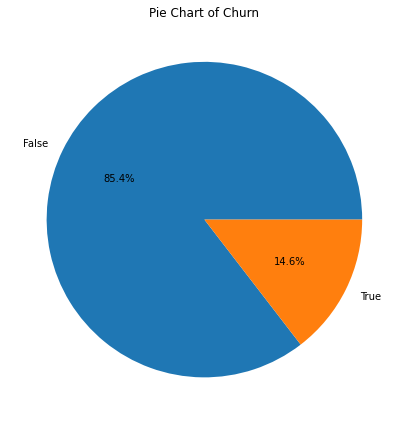

In [13]:
draw_categorical_plot(df['Churn'])

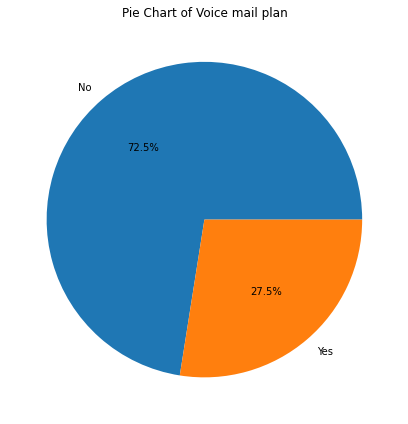

In [14]:
draw_categorical_plot(df['Voice mail plan'])

<Axes: xlabel='Voice mail plan', ylabel='count'>

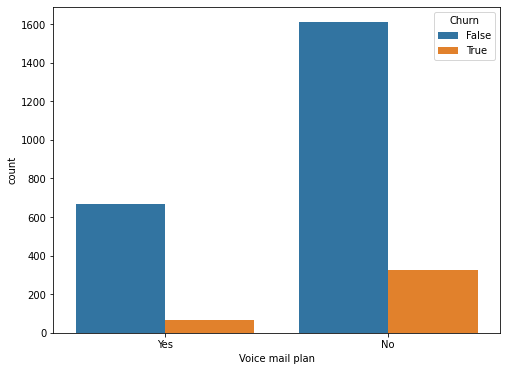

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x = 'Voice mail plan', hue = 'Churn')

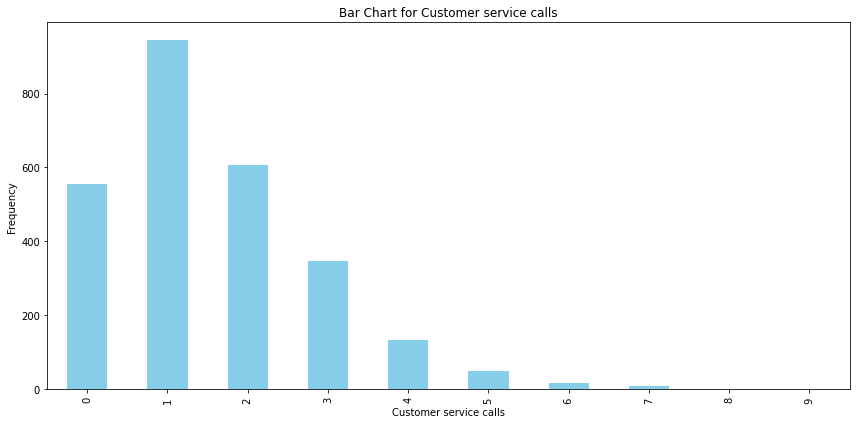

In [16]:
draw_numeric_plot(df['Customer service calls'])

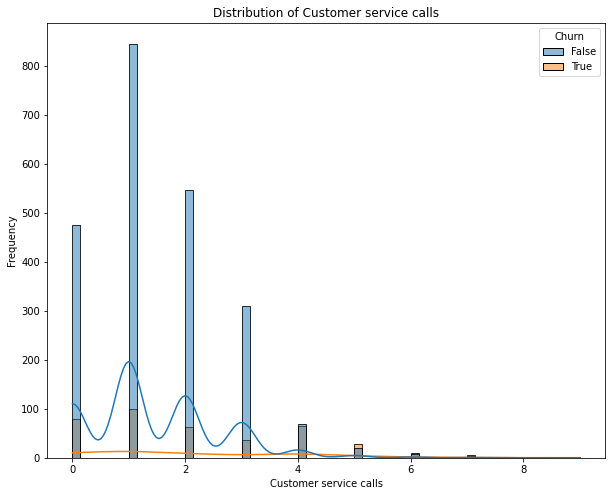

In [17]:
plot_data(df, 'Customer service calls', 'Churn')

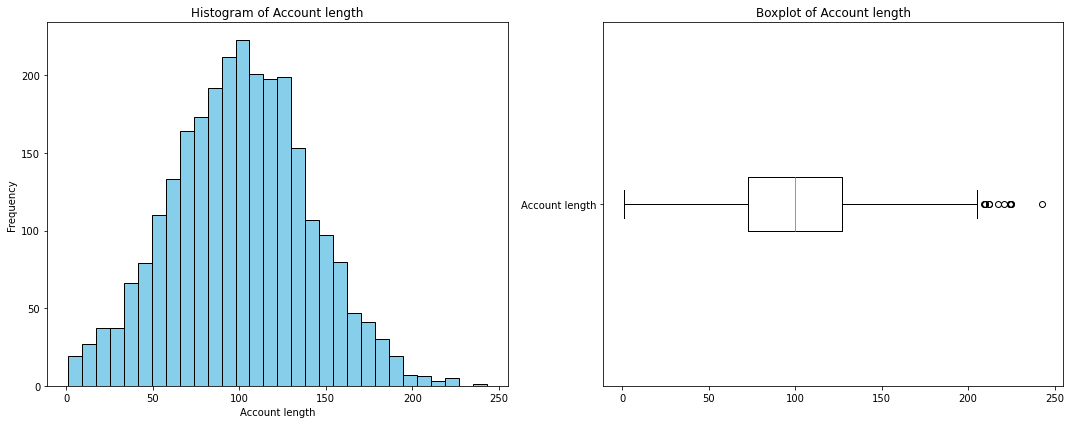

In [18]:
draw_numeric_plot(df['Account length'])

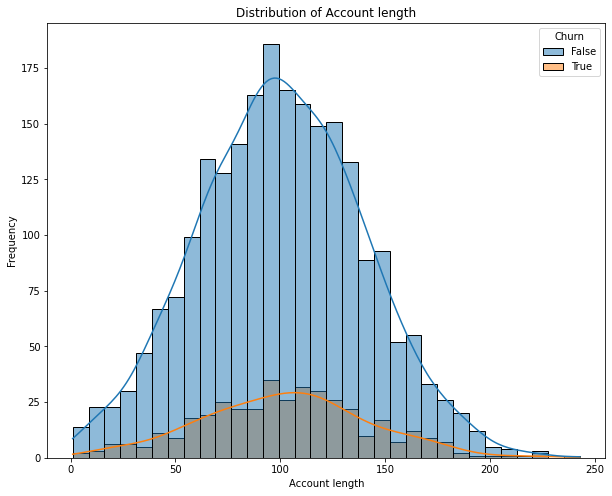

In [19]:
plot_data(df, 'Account length', 'Churn')

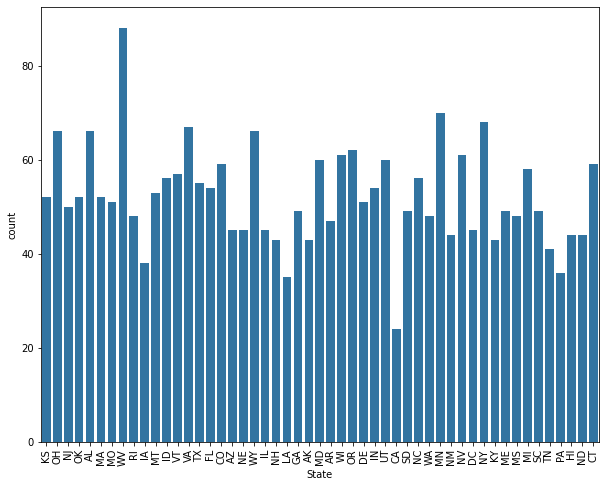

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(x='State', data=df)
plt.xticks(rotation=90)
plt.show()

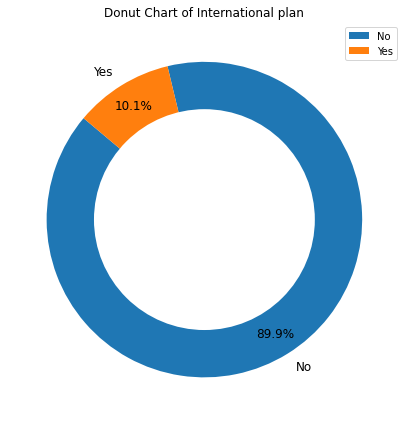

In [21]:
draw_numeric_plot(df['International plan'])

## Feature Enginnering

In [22]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Voice mail plan'], df['Churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 25.65625337995575
P-value: 4.079713016862758e-07


In [23]:
le=LabelEncoder()
df['State']=le.fit_transform(df['State'])

In [24]:
df['International plan']=le.fit_transform(df['International plan'])

In [25]:
df['Voice mail plan']=le.fit_transform(df['Voice mail plan'])

In [26]:
df['Churn']=le.fit_transform(df['Churn'])
y=df['Churn']

In [27]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


<Axes: >

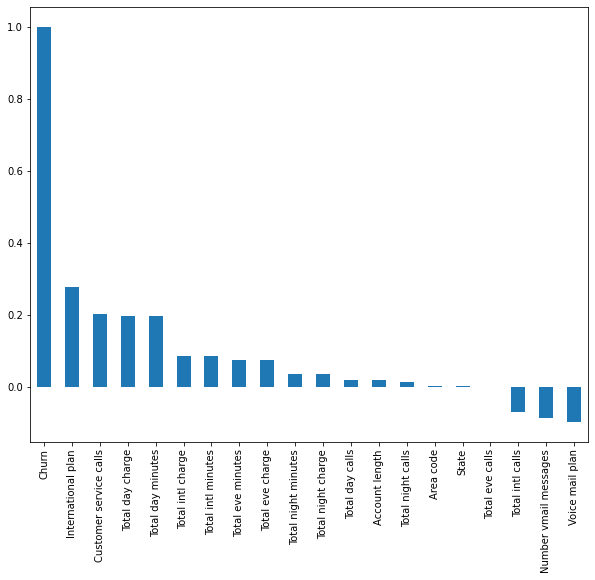

In [28]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation
target_corr = numeric_df.corr()['Churn'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 8))
target_corr.plot(kind='bar')


<Axes: >

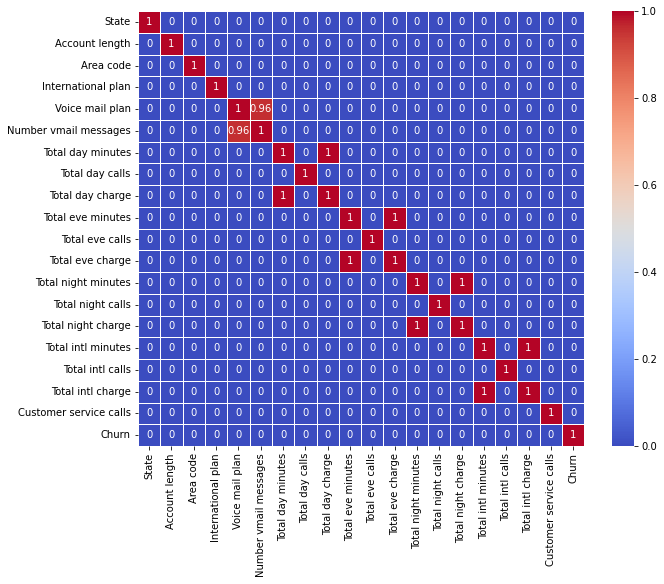

In [29]:
# Compute the correlation
corr = numeric_df.corr()

# Filter for high correlations
high_corr = corr[abs(corr) > 0.5].fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, linewidths=.5)

In [30]:
to_drop = ['State', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']

## Data preprocessing

In [31]:
df.drop(to_drop, axis = 1, inplace = True)

In [32]:
X = df.drop('Churn', axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42, stratify=y)

## Model Selection

In [34]:
models = {
    'LogisticRegression': LogisticRegression(),
    'MultinomialNB': MultinomialNB()
}
param_grids = {
    'LogisticRegression': {'clf__C': [0.1, 1, 10]},
    'MultinomialNB': {'clf__alpha': [0.1, 1, 10]}
}

best_models = {}
for name in models:
    pipeline = Pipeline([
        ('clf', models[name])
    ])
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    model=grid_search.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    best_models[name] = (grid_search.best_estimator_,accuracy_score(y_test, y_pred))
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for LogisticRegression: {'clf__C': 0.1}
Best parameters for MultinomialNB: {'clf__alpha': 10}


C:\Users\AMB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
for name, model in best_models.items():
    y_pred = model[0].predict(X_test)
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Evaluation for LogisticRegression:
Accuracy: 0.8470764617691154
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       570
           1       0.33      0.05      0.09        97

    accuracy                           0.85       667
   macro avg       0.60      0.52      0.50       667
weighted avg       0.78      0.85      0.80       667

[[560  10]
 [ 92   5]]
Evaluation for MultinomialNB:
Accuracy: 0.5097451274362819
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       570
           1       0.19      0.74      0.31        97

    accuracy                           0.51       667
   macro avg       0.55      0.61      0.46       667
weighted avg       0.81      0.51      0.58       667

[[268 302]
 [ 25  72]]


In [36]:
best_model_name = max(best_models, key=lambda name: best_models[name][1])
best_model = best_models[best_model_name][0]

print(f"The best model is {best_model_name} with an accuracy of {best_models[best_model_name][1]:.4f}")

The best model is LogisticRegression with an accuracy of 0.8471


## Model Evaluation

In [37]:
y_pred = best_model.predict(X_test)

print(f"Final Evaluation for {best_model_name}:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(f"{best_model_name} Confusion Matrix:")
print(cm)

Final Evaluation for LogisticRegression:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       570
           1       0.33      0.05      0.09        97

    accuracy                           0.85       667
   macro avg       0.60      0.52      0.50       667
weighted avg       0.78      0.85      0.80       667

LogisticRegression Confusion Matrix:
[[560  10]
 [ 92   5]]


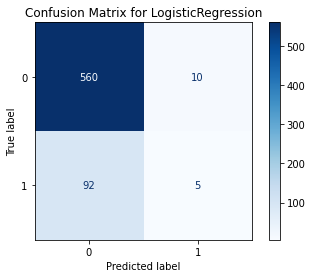

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for {best_model_name}");